<a href="https://colab.research.google.com/github/RamanGuduru/straw-hat/blob/main/Guduru_V_N_S_Ganesh_Raman_Datahack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = pd.read_csv('training_set_features.csv',index_col = 0)
y = pd.read_csv('training_set_labels.csv',index_col=0)
print(X.head())

               xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
respondent_id                                                          
0                      1.0            0.0                        0.0   
1                      3.0            2.0                        0.0   
2                      1.0            1.0                        0.0   
3                      1.0            1.0                        0.0   
4                      2.0            1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  

In [5]:
print(y.head())

               xyz_vaccine  seasonal_vaccine
respondent_id                               
0                        0                 0
1                        0                 1
2                        0                 0
3                        0                 1
4                        0                 0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

<Axes: >

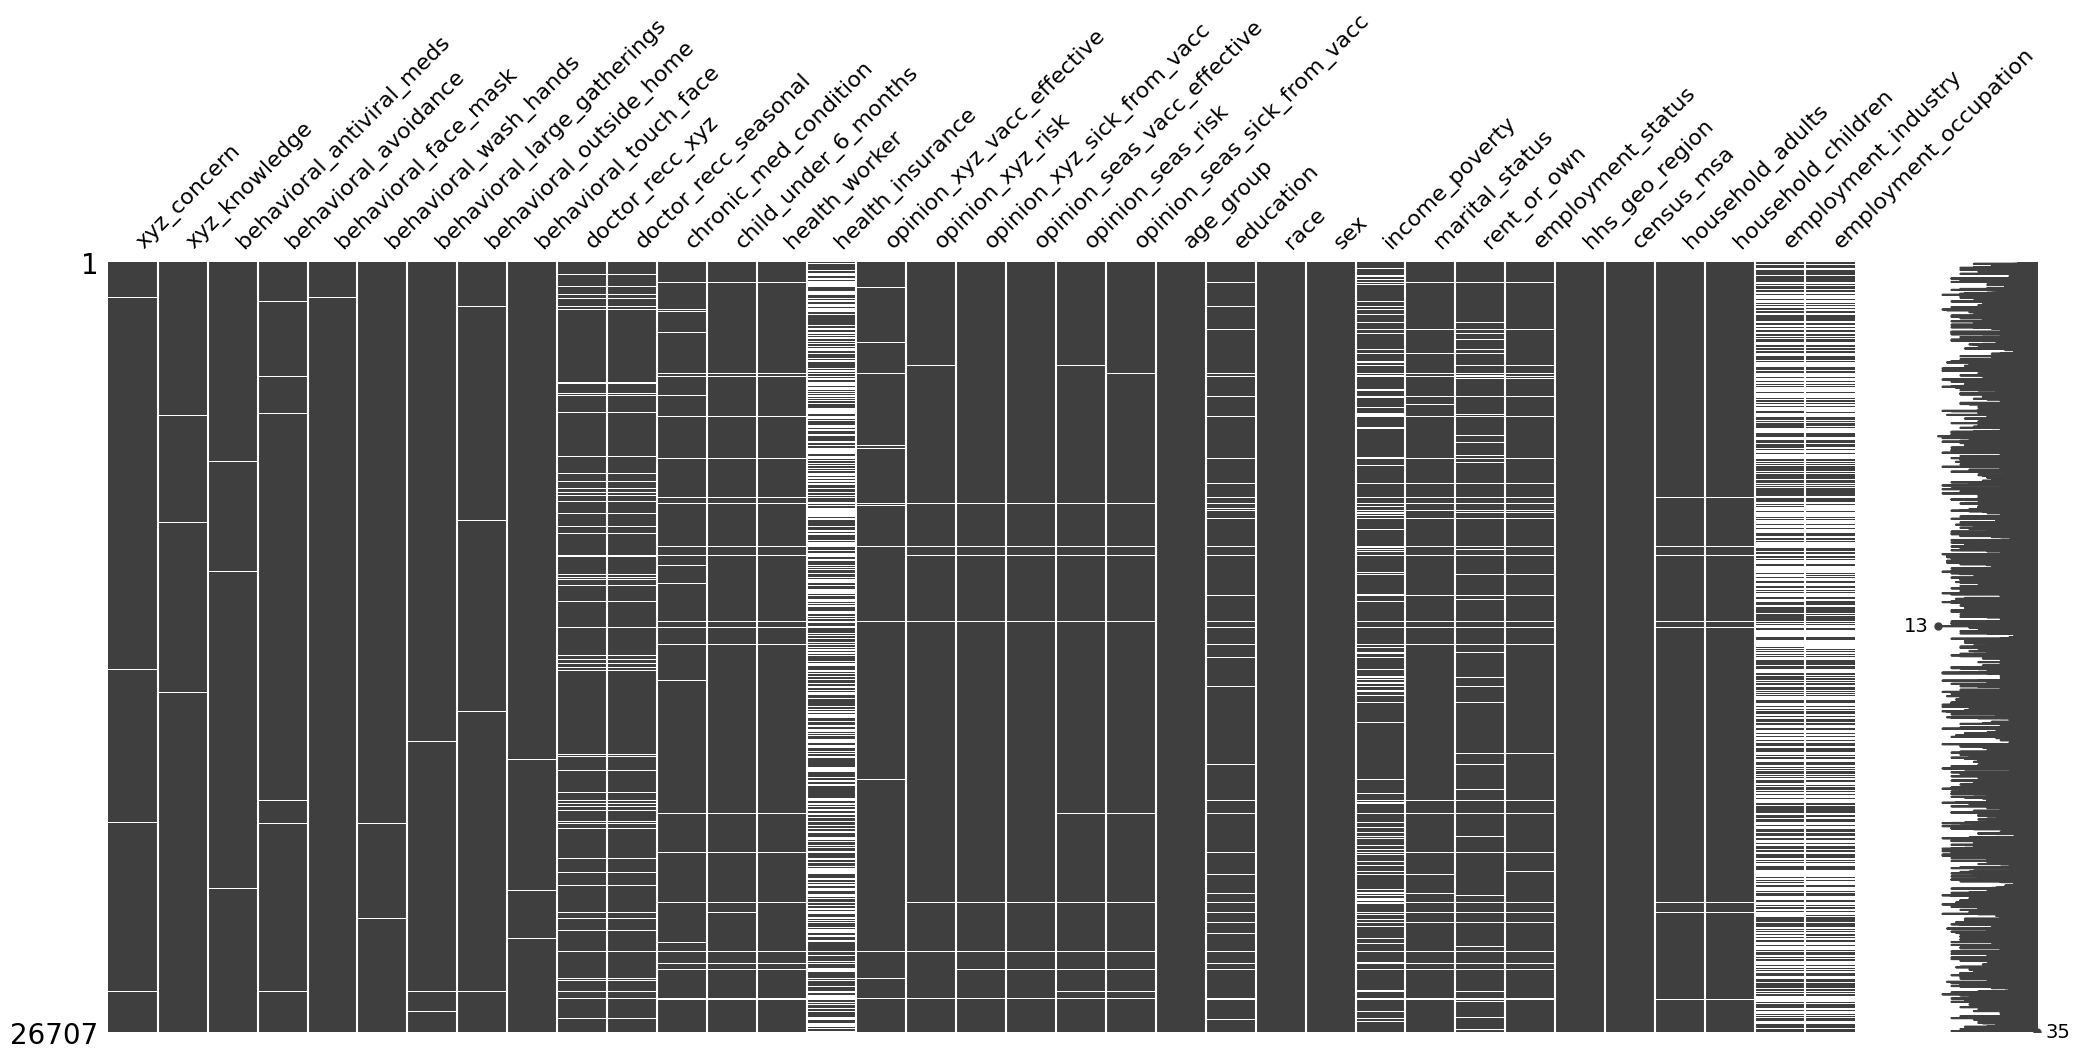

In [7]:
import missingno as msno
msno.matrix(X)

In [8]:
X.drop('health_insurance',axis=1,inplace=True)
X.drop('employment_industry',axis=1,inplace=True)
X.drop('employment_occupation',axis=1,inplace=True)

array([[<Axes: title={'center': 'xyz_concern'}>,
        <Axes: title={'center': 'xyz_knowledge'}>,
        <Axes: title={'center': 'behavioral_antiviral_meds'}>,
        <Axes: title={'center': 'behavioral_avoidance'}>,
        <Axes: title={'center': 'behavioral_face_mask'}>],
       [<Axes: title={'center': 'behavioral_wash_hands'}>,
        <Axes: title={'center': 'behavioral_large_gatherings'}>,
        <Axes: title={'center': 'behavioral_outside_home'}>,
        <Axes: title={'center': 'behavioral_touch_face'}>,
        <Axes: title={'center': 'doctor_recc_xyz'}>],
       [<Axes: title={'center': 'doctor_recc_seasonal'}>,
        <Axes: title={'center': 'chronic_med_condition'}>,
        <Axes: title={'center': 'child_under_6_months'}>,
        <Axes: title={'center': 'health_worker'}>,
        <Axes: title={'center': 'opinion_xyz_vacc_effective'}>],
       [<Axes: title={'center': 'opinion_xyz_risk'}>,
        <Axes: title={'center': 'opinion_xyz_sick_from_vacc'}>,
        <Axes

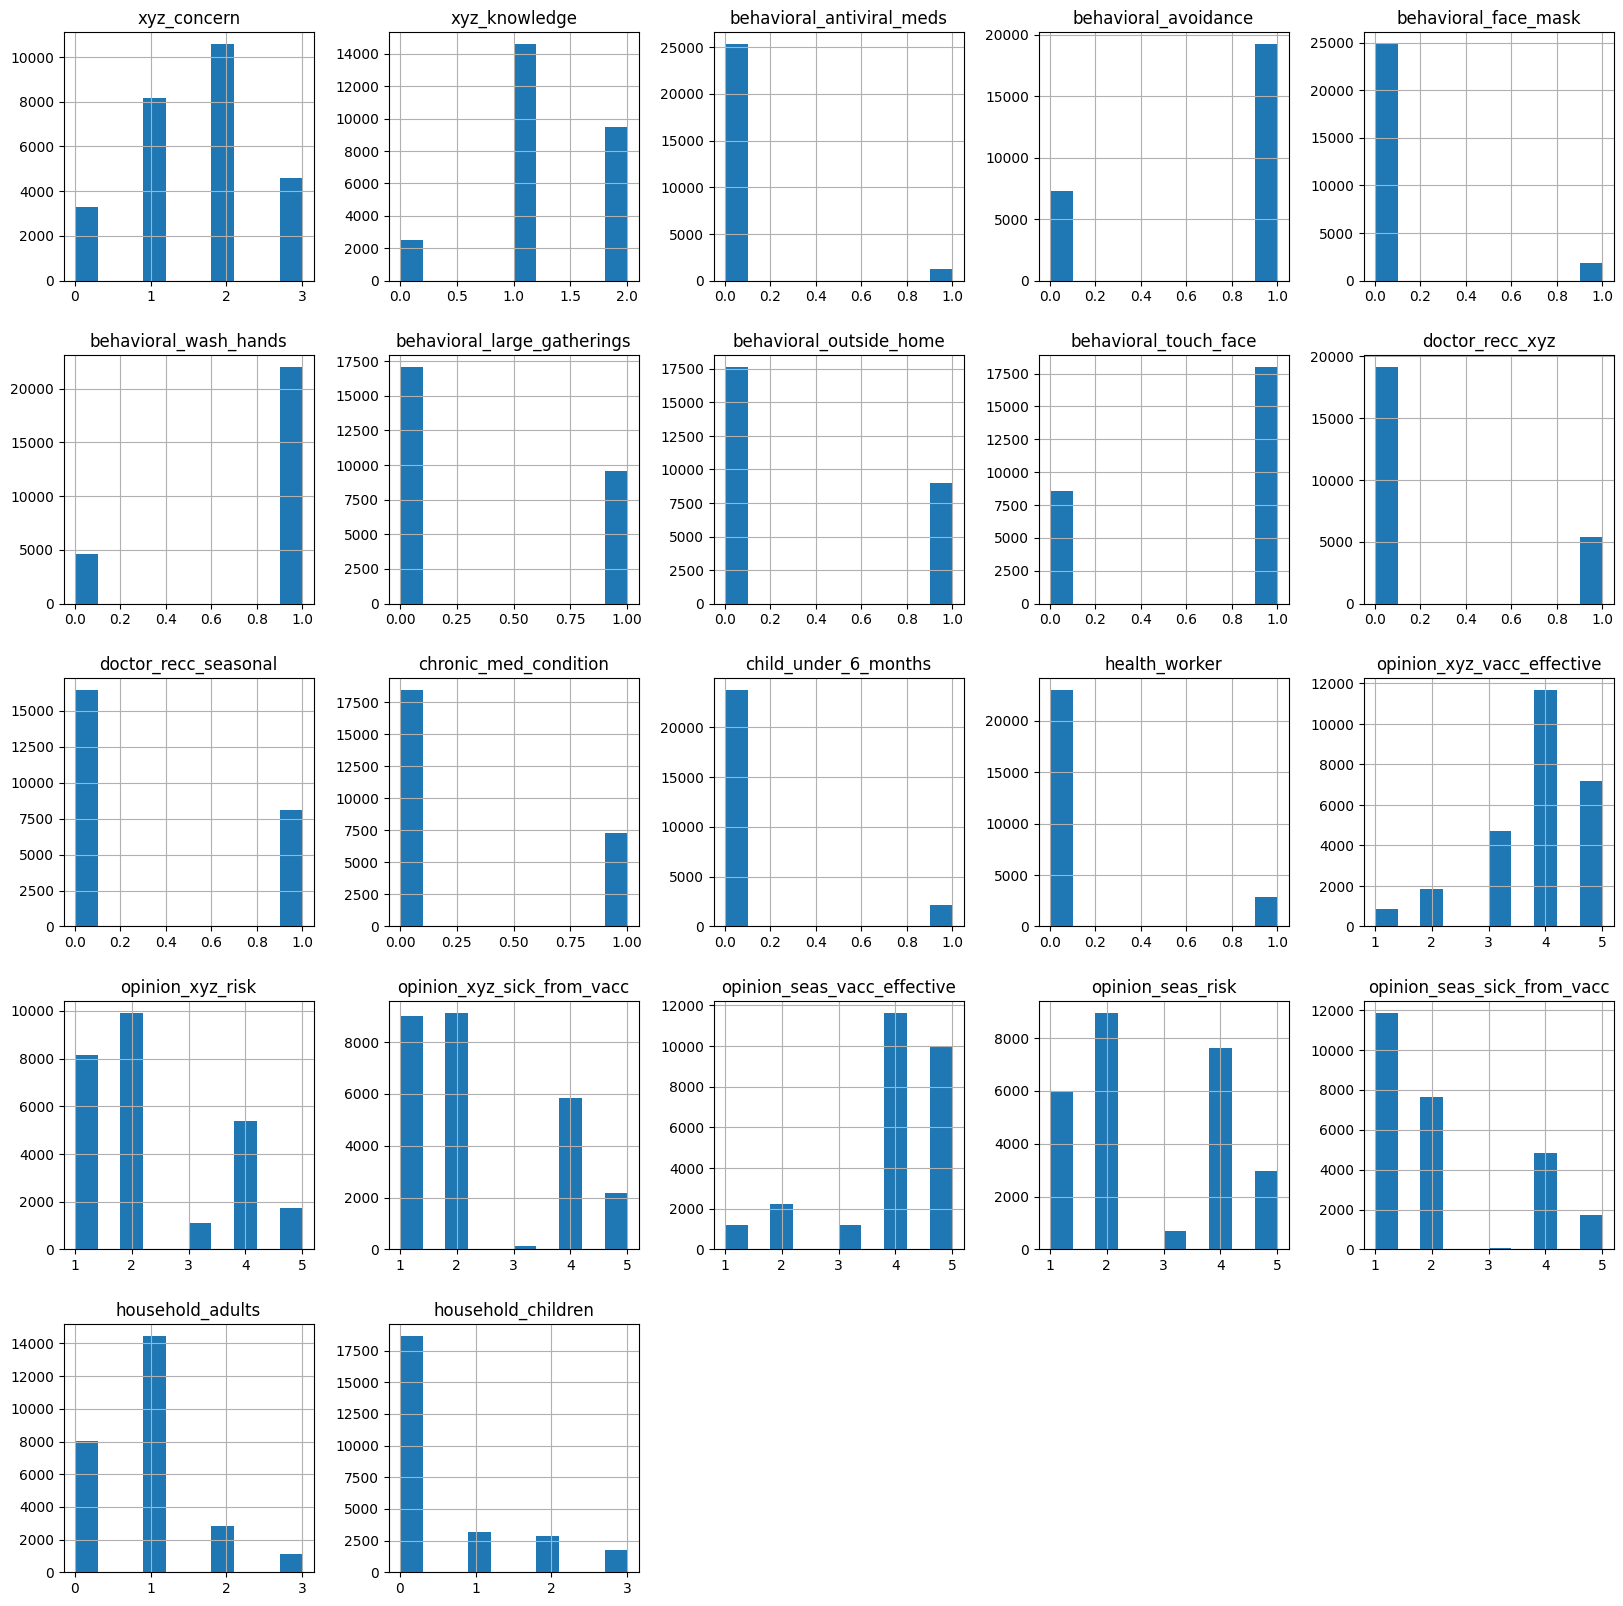

In [9]:
X.hist(figsize=(20,20))

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X_1 = imputer.fit_transform(X)
X_1 = pd.DataFrame(X_1, columns=X.columns)
X_1.isna().sum(axis=0)

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_1 = ordinal_encoder.fit_transform(X_1)
print(ordinal_encoder.categories_[-6])
X_1 = pd.DataFrame(X_1, columns=X.columns)
X_1.head()

['Own' 'Rent']


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,0.0,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,0.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0


array([[<Axes: title={'center': 'xyz_concern'}>,
        <Axes: title={'center': 'xyz_knowledge'}>,
        <Axes: title={'center': 'behavioral_antiviral_meds'}>,
        <Axes: title={'center': 'behavioral_avoidance'}>,
        <Axes: title={'center': 'behavioral_face_mask'}>,
        <Axes: title={'center': 'behavioral_wash_hands'}>],
       [<Axes: title={'center': 'behavioral_large_gatherings'}>,
        <Axes: title={'center': 'behavioral_outside_home'}>,
        <Axes: title={'center': 'behavioral_touch_face'}>,
        <Axes: title={'center': 'doctor_recc_xyz'}>,
        <Axes: title={'center': 'doctor_recc_seasonal'}>,
        <Axes: title={'center': 'chronic_med_condition'}>],
       [<Axes: title={'center': 'child_under_6_months'}>,
        <Axes: title={'center': 'health_worker'}>,
        <Axes: title={'center': 'opinion_xyz_vacc_effective'}>,
        <Axes: title={'center': 'opinion_xyz_risk'}>,
        <Axes: title={'center': 'opinion_xyz_sick_from_vacc'}>,
        <Axes:

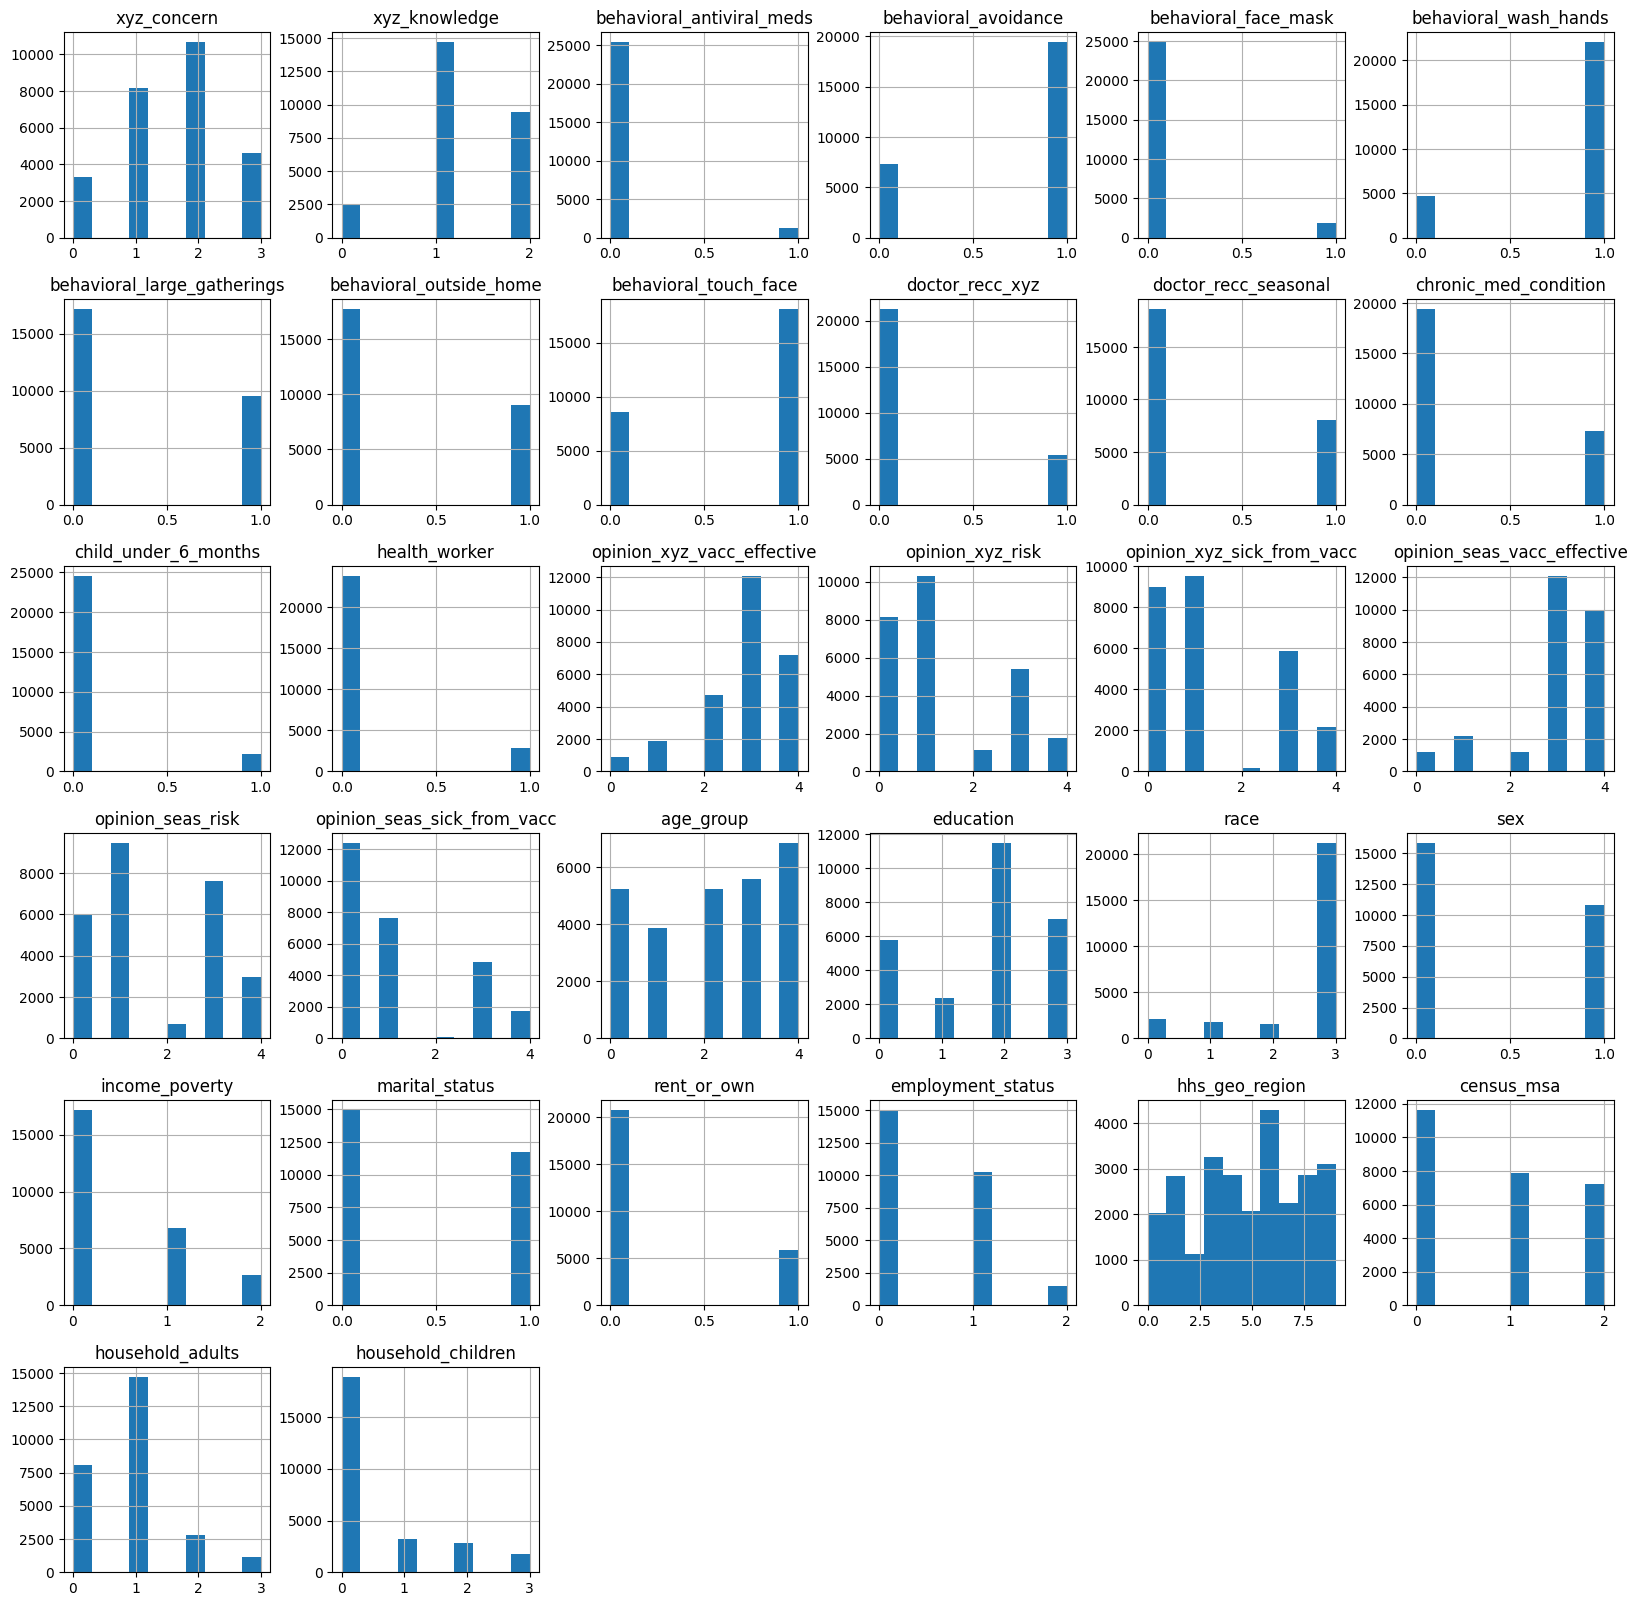

In [12]:
X_1.hist(figsize=(20,20))

In [21]:
X_xyz = X_1.drop(['doctor_recc_seasonal','opinion_seas_risk','opinion_seas_sick_from_vacc','opinion_seas_vacc_effective'],axis=1)
y_xyz = y.iloc[:,0]

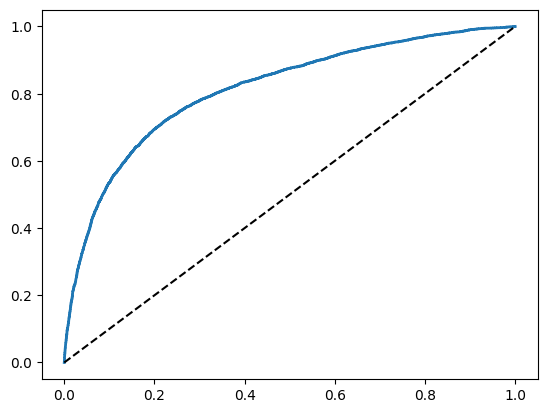

0.8127941386767199

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=40)
from sklearn.model_selection import cross_val_predict
y_xyz_pred = cross_val_predict(sgd_clf, X_xyz, y_xyz, cv=3,method='decision_function')
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_xyz, y_xyz_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_xyz, y_xyz_pred)

0.7189329318359197


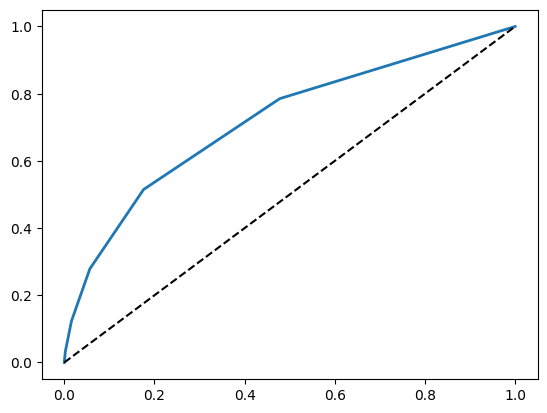

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
y_xyz_pred2 = cross_val_predict(knn_clf, X_xyz, y_xyz, cv=3,method="predict_proba")
print(roc_auc_score(y_xyz, y_xyz_pred2[:,1]))
fpr, tpr, thresholds = roc_curve(y_xyz, y_xyz_pred2[:,1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

0.7836716958249856


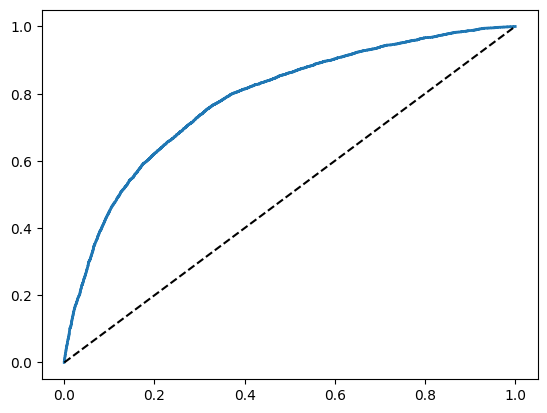

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_xyz_pred3 = cross_val_predict(gnb, X_xyz, y_xyz, cv=3,method="predict_proba")
print(roc_auc_score(y_xyz, y_xyz_pred3[:,1]))
fpr, tpr, thresholds = roc_curve(y_xyz, y_xyz_pred3[:,1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [65]:
X_seas = X_1.drop(['doctor_recc_xyz','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_xyz_vacc_effective','xyz_concern','xyz_knowledge'],axis=1)
y_seas = y.iloc[:,1]

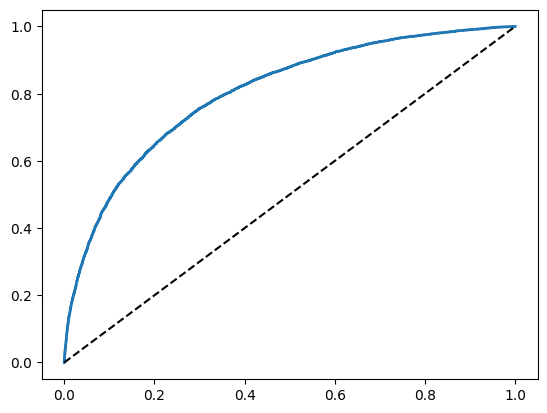

0.8025721475889874

In [66]:
sgd_clf = SGDClassifier(random_state=40)
y_seas_pred = cross_val_predict(sgd_clf, X_seas, y_seas, cv=3,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_seas, y_seas_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_seas, y_seas_pred)


In [68]:
X_test = pd.read_csv("test_set_features.csv",index_col=0)
X_test.drop('health_insurance',axis=1,inplace=True)
X_test.drop('employment_industry',axis=1,inplace=True)
X_test.drop('employment_occupation',axis=1,inplace=True)
imputer = SimpleImputer(strategy="most_frequent")
X_test1 = imputer.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns)
X_test1.isna().sum(axis=0)

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [70]:
ordinal_encoder = OrdinalEncoder()
X_test1 = ordinal_encoder.fit_transform(X_test1)
X_test1 = pd.DataFrame(X_test1, columns=X.columns)

In [82]:
X_xyz_test = X_test1.drop(['doctor_recc_seasonal','opinion_seas_risk','opinion_seas_sick_from_vacc','opinion_seas_vacc_effective'],axis=1)
sgd_clf = SGDClassifier(random_state=40)
sgd_clf.fit(X_xyz, y_xyz)
y_test = sgd_clf.decision_function(X_xyz_test)
y_test = pd.DataFrame(y_test,columns=['h1n1_vaccine'],index=X_test.index)

In [84]:
X_seas_test = X_test1.drop(['doctor_recc_xyz','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_xyz_vacc_effective','xyz_concern','xyz_knowledge'],axis=1)
sgd_clf = SGDClassifier(random_state=40)
sgd_clf.fit(X_seas, y_seas)
y_test['seasonal_vaccine'] = sgd_clf.decision_function(X_seas_test)
y_test.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,-2.209469,-2.144591
26708,-2.321321,-3.206737
26709,-0.690868,0.040239
26710,-0.385427,1.498627
26711,-1.564171,0.045743


In [85]:
pd.DataFrame(y_test).to_csv('submission.csv')